In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


### -------- Case study: Personal Savings Planner --------

In [9]:

class SavingsState(TypedDict):
    # ---- Inputs (given by user) ----
    income_usd: float        # monthly income
    expenses_usd: float      # monthly expenses

    # ---- Outputs (computed by nodes) ----
    savings_usd: float       # monthly savings
    yearly_savings_usd: float


In [10]:

# --------- Nodes (functions that update the state) ---------

def calc_savings(state: SavingsState) -> SavingsState:
    """Node 1: Calculate monthly savings = income - expenses"""
    state["savings_usd"] = state["income_usd"] - state["expenses_usd"]
    return state

def project_yearly(state: SavingsState) -> SavingsState:
    """Node 2: Project yearly savings = monthly savings × 12"""
    state["yearly_savings_usd"] = state["savings_usd"] * 12
    return state

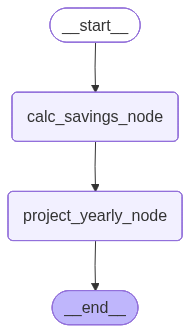

In [13]:

# --------- Build the Graph ---------
# State = SavingsState (defines inputs + outputs)
# Nodes = calc_savings_node, project_yearly_node
# Edges = connect the flow from START → calc_savings → project_yearly → END

builder = StateGraph(SavingsState)

# Add nodes (processing steps)
builder.add_node("calc_savings_node", calc_savings)
builder.add_node("project_yearly_node", project_yearly)

# Add edges (workflow order)
builder.add_edge(START, "calc_savings_node")           # start → calc_savings
builder.add_edge("calc_savings_node", "project_yearly_node")  # savings → yearly projection
builder.add_edge("project_yearly_node", END)           # end of workflow

# Compile the graph
graph = builder.compile()

# --------- Visualize Graph ---------
display(Image(graph.get_graph().draw_mermaid_png()))




In [14]:
# --------- Run Example ---------
# Input: monthly income = $3000, expenses = $2200
result = graph.invoke({
    "income_usd": 3000.0,     
    "expenses_usd": 2200.0    
})
result

{'income_usd': 3000.0,
 'expenses_usd': 2200.0,
 'savings_usd': 800.0,
 'yearly_savings_usd': 9600.0}